In [52]:
import numpy as np
import os
import tensorflow.keras
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.io as sio
import vis
import json
from tensorflow.keras.models import model_from_json, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

tf.compat.v1.disable_eager_execution()

In [2]:
density = '04'

#mode = 'expressive'
mode = 'receptive'


open_arch_name = 'leaky_upper_triang_RN_model_' + mode + '_arch_density_' + density + '.json'

with open(open_arch_name, 'r') as f:
    RN_model = model_from_json(f.read())
    

open_weights_name = 'leaky_upper_triang_RN_model_' + mode + '_weights_density_' + density + '.h5'

RN_model.load_weights(open_weights_name)

RN_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 116, 116, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 114, 114, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 114, 114, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 57, 57, 32)   0           leaky_re_lu_1[0][0]              
____________________________________________________________________________________________

x_train_shape: (116, 116, 17374)
x_test_shape: (116, 116, 8687)
y_train_shape: (17374, 1)
y_test_shape: (8687, 1)


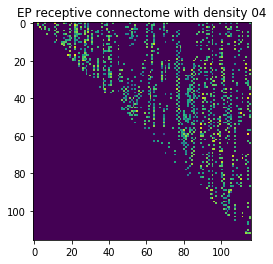

In [4]:
# Load Data

# expressive data dir
dir_name = '../processed_data/receptive_data/'

density = '04'

# load train data

fname = 'x_train_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_train_mat = sio.loadmat(filename)['x_train_receptive_mat']
x_train_mat = np.float32(x_train_mat)

fname = 'y_train_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_train_mat = sio.loadmat(filename)['y_train_receptive_mat']
y_train_mat = np.float32(y_train_mat)

# load test data
fname = 'x_test_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
x_test_mat = sio.loadmat(filename)['x_test_receptive_mat']
x_test_mat = np.float32(x_test_mat)

fname = 'y_test_receptive_density_' + density + '.mat'
filename = os.path.join(os.getcwd(),dir_name,fname)
y_test_mat = sio.loadmat(filename)['y_test_receptive_mat']
y_test_mat = np.float32(y_test_mat)

print('x_train_shape:',x_train_mat.shape)
print('x_test_shape:',x_test_mat.shape)
print('y_train_shape:',y_train_mat.shape)
print('y_test_shape:',y_test_mat.shape)


# Form training and testing data

x_train = np.zeros((x_train_mat.shape[2],116,116,1),dtype=np.float32)
y_train = np.zeros((x_train_mat.shape[2],1),dtype=np.float32)

x_test = np.zeros((x_test_mat.shape[2],116,116,1),dtype=np.float32)
y_test = np.zeros((x_test_mat.shape[2],1),dtype=np.float32)


for i in range(x_train_mat.shape[2]):
    temp = x_train_mat[:,:,i]
    temp = np.triu(temp,1)
    x_train[i,:,:,0] = temp
    y_train[i,0] = y_train_mat[i,0] # RECEPTIVE SCORE
        
for i in range(x_test_mat.shape[2]):
    temp = x_test_mat[:,:,i]
    temp = np.triu(temp,1)
    x_test[i,:,:,0] = temp
    y_test[i,0] = y_test_mat[i,0]  # RECEPTIVE SCORE
    
    

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

input_shape = (x_train.shape[1], x_train.shape[2], 1)


x_patient_2 = x_test[2,:,:,0]


plt.figure()
plt.imshow(x_patient_2)
plt.title('EP receptive connectome with density'+' '+density)
plt.show()

In [5]:
# Test RN Model

y_test_pred = RN_model.predict(x_test)

# Print Results
print('mae: ', np.mean(np.abs(y_test - y_test_pred)))
print('sdae: ', np.std(np.abs(y_test - y_test_pred)))

count = 0
for i in range(len(y_test)):
    if (np.abs(y_test[i] - y_test_pred[i])) < 0.125: # prob of abs error less than 15 - 15/120 = 0.125
        count += 1
            
prob_error = count / len(y_test)

print('prob of mae less than 0.125: ', prob_error)

mae:  0.006344177
sdae:  0.023851609
prob of mae less than 0.125:  0.9803154138367676


In [6]:
for ilayer, layer in enumerate(RN_model.layers):
    print('{:3.0f} {:10}'.format(ilayer, layer.name))

final_layer = RN_model.layers[-1]    
print(final_layer.name)

  0 input_1   
  1 conv2d_1  
  2 leaky_re_lu_1
  3 max_pooling2d_1
  4 batch_normalization_1
  5 conv2d_2  
  6 leaky_re_lu_2
  7 max_pooling2d_2
  8 batch_normalization_2
  9 conv2d_3  
 10 leaky_re_lu_3
 11 max_pooling2d_3
 12 batch_normalization_3
 13 conv2d_4  
 14 leaky_re_lu_4
 15 max_pooling2d_4
 16 batch_normalization_4
 17 lambda_1  
 18 lambda_2  
 19 lambda_4  
 20 lambda_3  
 21 concatenate_1
 22 dense_1   
 23 leaky_re_lu_5
 24 dense_2   
 25 leaky_re_lu_6
 26 dense_3   
 27 leaky_re_lu_7
 28 dense_4   
 29 leaky_re_lu_8
 30 average_1 
 31 dense_5   
 32 leaky_re_lu_9
 33 dropout_1 
 34 dense_6   
 35 leaky_re_lu_10
 36 dropout_2 
 37 dense_7   
 38 leaky_re_lu_11
 39 dense_8   
dense_8


In [7]:
# Connectome matrix of test patient
x_pat = x_test[21,:,:,0]
#x_pat = x_train[10,:,:,0]
x_pat_3 = x_pat[np.newaxis,:,:,np.newaxis]
print(x_pat_3.shape)
y_pred = RN_model.predict(x_pat_3)
img = x_pat
print(img.shape)
img = img.reshape(x_test.shape[1], x_test.shape[2], 1) # here img forms the seed_image for visualization
print(img.shape)

print(y_pred[0][0])

(1, 116, 116, 1)
(116, 116)
(116, 116, 1)
0.42432547


In [42]:
from vis.utils import utils
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation
import tensorflow.keras.backend as K
from scipy.ndimage.interpolation import zoom

In [43]:
# select score of interest - here only 1 expressive score - hence class_idx = 0
class_idx = 0
seed_input = img

# feature map from the final convolutional layer
#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_1')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_1')

#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_2')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_2')

#final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_3')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_3')

final_fmap_idx = utils.find_layer_idx(RN_model, 'conv2d_4')
#final_fmap_idx = utils.find_layer_idx(RN_model, 'max_pooling2d_4')

print(final_fmap_idx)
penultimate_output = RN_model.layers[final_fmap_idx].output
print(penultimate_output)

13
Tensor("conv2d_4/Identity:0", shape=(None, 7, 7, 32), dtype=float32)


In [44]:
layer_input = RN_model.input
print(layer_input)
fmap_func = K.function([layer_input],[penultimate_output])
print(fmap_func)

Tensor("input_1:0", shape=(None, 116, 116, 1), dtype=float32)


In [45]:
fmap = fmap_func([img[np.newaxis,...]])[0]
print(fmap.shape)

(1, 7, 7, 32)


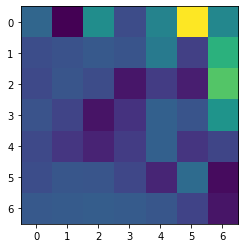

In [46]:
img1 = fmap[0,:,:,15]
#img2 = img1.T

#img3 = img1 - img2
plt.imshow(img1)
#plt.imshow(img2)
#plt.imshow(img3)
#print(img3.shape)

In [47]:
# define derivative d(loss^c) / d (A^k), k = 1,2,....32
layer_input = RN_model.input
print(layer_input)

Tensor("input_1:0", shape=(None, 116, 116, 1), dtype=float32)


In [48]:
layer_idx = utils.find_layer_idx(RN_model,'dense_8')
# This model is using linear activation for the final layer
loss = RN_model.layers[layer_idx].output[...,class_idx]
print(loss)

Tensor("strided_slice_4:0", shape=(None,), dtype=float32)


In [50]:
# Swap softmax with linear
#RN_model.layers[layer_idx].activation = tensorflow.keras.activations.linear
#RN_model = utils.apply_modifications(RN_model)

In [53]:
# calculate gradients
grad_wrt_fmap = K.gradients(loss,penultimate_output)[0]
print(grad_wrt_fmap)

Tensor("gradients/leaky_re_lu_4/LeakyRelu_grad/LeakyReluGrad:0", shape=(None, 7, 7, 32), dtype=float32)


In [54]:
# define function to evaluate the gradient for a given input - output is numpy array
# learning_phase is a flag - 0 = test, 1
grad_wrt_fmap_func = K.function([layer_input,K.learning_phase()],[penultimate_output,grad_wrt_fmap])
print(grad_wrt_fmap_func)

ValueError: Tensor Tensor("conv2d_4/Identity:0", shape=(None, 7, 7, 32), dtype=float32) is not an element of this graph.

In [55]:
# evaluate the derivative function
fmap_eval, grad_wrt_fmap_eval = grad_wrt_fmap_func([img[np.newaxis,...],0])
print("Feature Map shape: ",fmap_eval.shape)
print("Gradients shape: ",grad_wrt_fmap_eval.shape)


NameError: name 'grad_wrt_fmap_func' is not defined

In [56]:
# evaluate the derivative function
fmap_eval, grad_wrt_fmap_eval = grad_wrt_fmap_func([img[np.newaxis,...],0])
print("Feature Map shape: ",fmap_eval.shape)
print("Gradients shape: ",grad_wrt_fmap_eval.shape)


NameError: name 'grad_wrt_fmap_func' is not defined

In [57]:
# normalize the gradients by maximum value - add K.epsilon for numerical stability
#grad_wrt_fmap_eval /= (np.max(grad_wrt_fmap_eval) + K.epsilon())
print(grad_wrt_fmap_eval.shape)
img2 = grad_wrt_fmap_eval[0,:,:,15]
plt.imshow(img2)

NameError: name 'grad_wrt_fmap_eval' is not defined

In [58]:
# obtain the weights alpha_k_c - reshape to bring it to the same shape as final fmap_eval - needed to multiply them
alpha_k_c = grad_wrt_fmap_eval.mean(axis=(0,1,2)).reshape(1,1,1,-1)
print(alpha_k_c.shape)

NameError: name 'grad_wrt_fmap_eval' is not defined

In [59]:
# visualize the weights - alpha_k_c
plt.figure(figsize=(20,5))
plt.plot(alpha_k_c.flatten())
plt.xlabel("Feature Map at Final Convolutional Layer")
plt.ylabel("weights - alpha_k_c")
plt.title("The {}th feature map has the largest weight alpha_k_c".format(np.argmax(alpha_k_c.flatten())))
plt.show()

NameError: name 'alpha_k_c' is not defined

<Figure size 1440x360 with 0 Axes>

In [60]:
#visualize 15th feature map wit the largest weight
plt.imshow(fmap_eval[0,:,:,5])
plt.title("feature map with largest weight alpha")
plt.show()

NameError: name 'fmap_eval' is not defined